In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Questions:


Which countries are the top CO₂ emitters today and how has that changed over time?

How has CO₂ intensity (emissions per unit GDP) changed for developing vs. developed countries?


Is there a relationship between a country's GDP and its CO₂ emissions or per-capita emissions?


Which countries have successfully reduced their CO₂ emissions since 1990?


What share of energy consumption comes from low-carbon sources in different countries?


How do countries in the same region compare in terms of emissions per capita?

What is the distribution of per-capita CO₂ emissions across countries in a given year?

How do cumulative CO₂ emissions compare to current emissions?

In [88]:

df = pd.read_csv("data/owid-co2-data.csv")

# keep 1960‑2024 for most countries with good data
df = df[df.year >= 1940]

# drop rows without total_CO2 (too sparse: small islands, micro‑states)
df = df.dropna(subset=["co2"])

# quick renames for brevity
df = df.rename(columns={"co2":"co2_mt",             # million tonnes
                        "co2_per_capita":"co2_pc",
                        "share_lf_total_energy":"low_carbon_share"})

# fill forward GDP gaps so intensity calc won't break
df["gdp"] = df.groupby("country")["gdp"].ffill()
df["co2_intensity"] = df["co2_mt"]*1e6 / df["gdp"]   # kg per 2015‑USD

print(df[["co2_mt", "co2_pc", "gdp", "population", "co2_intensity"]].describe())
for col in df.columns:
    print(col)

             co2_mt        co2_pc           gdp    population  co2_intensity
count  18633.000000  17447.000000  1.206500e+04  1.710200e+04   12065.000000
mean     583.311047      5.173011  5.889021e+11  9.927125e+07       0.000371
std     2395.754830     17.391967  4.628394e+12  4.752810e+08       0.000841
min        0.000000      0.000000  5.543200e+07  1.472000e+03       0.000000
25%        0.652000      0.421000  9.759056e+09  1.042621e+06       0.000134
50%        7.720000      1.985000  3.505827e+10  5.260330e+06       0.000247
75%       82.416000      6.320500  1.604561e+11  2.004414e+07       0.000453
max    37791.570000    782.682000  1.301126e+14  8.091735e+09       0.082576
country
year
iso_code
population
gdp
cement_co2
cement_co2_per_capita
co2_mt
co2_growth_abs
co2_growth_prct
co2_including_luc
co2_including_luc_growth_abs
co2_including_luc_growth_prct
co2_including_luc_per_capita
co2_including_luc_per_gdp
co2_including_luc_per_unit_energy
co2_pc
co2_per_gdp
co2_per_unit_e

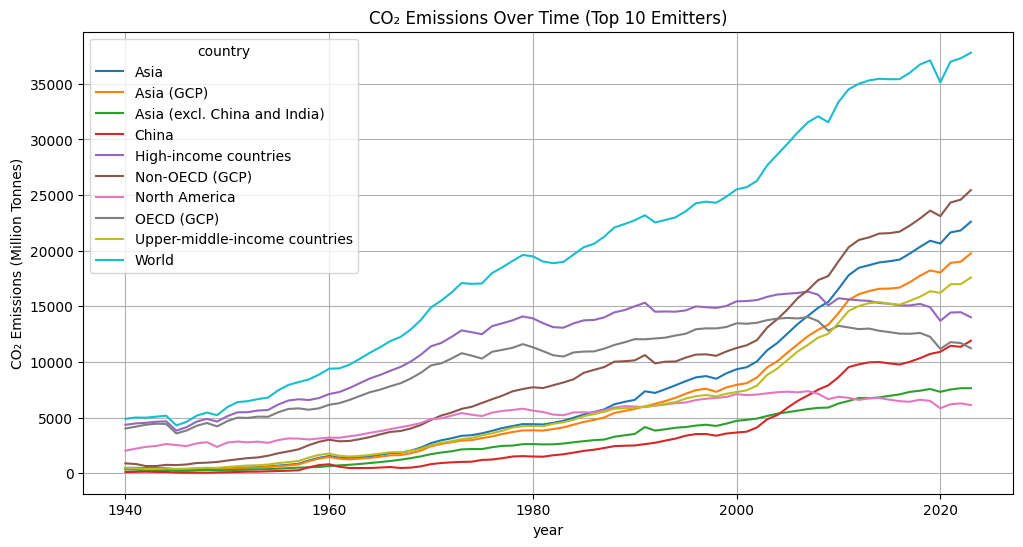

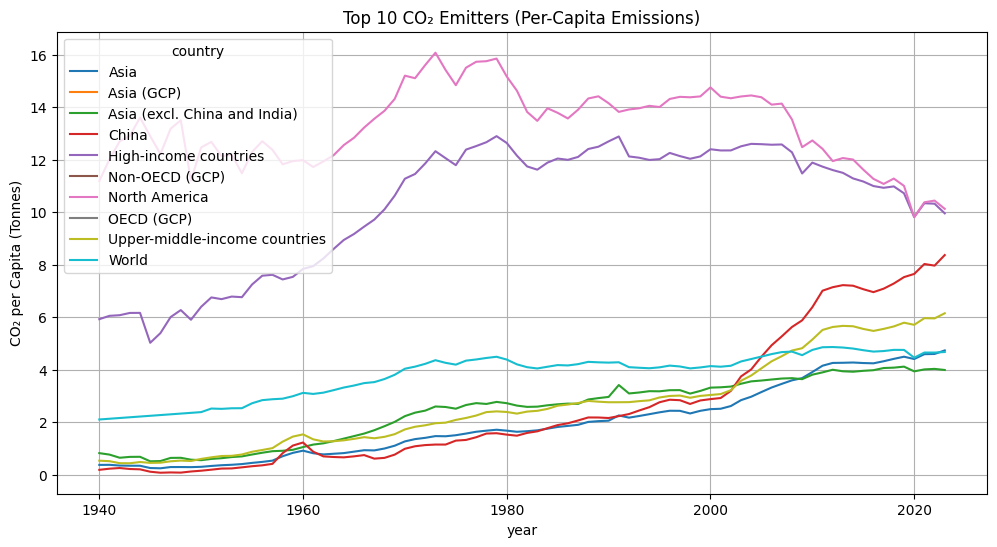

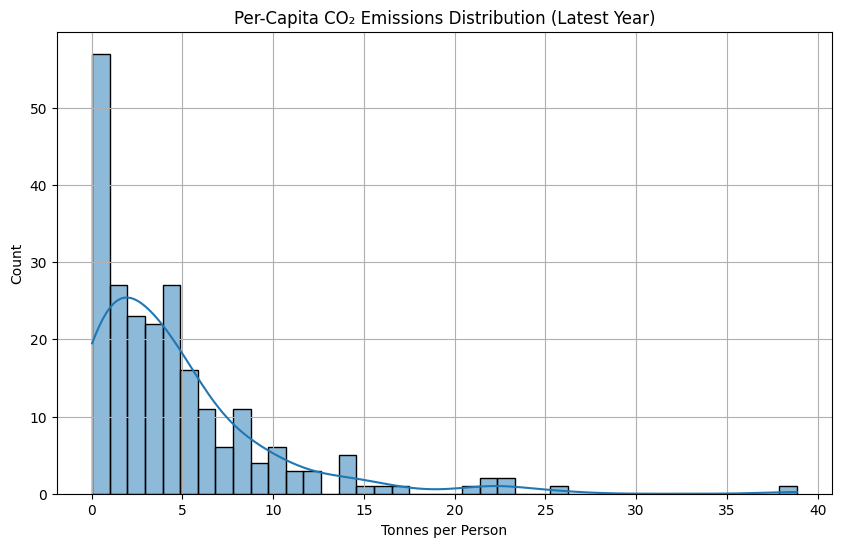

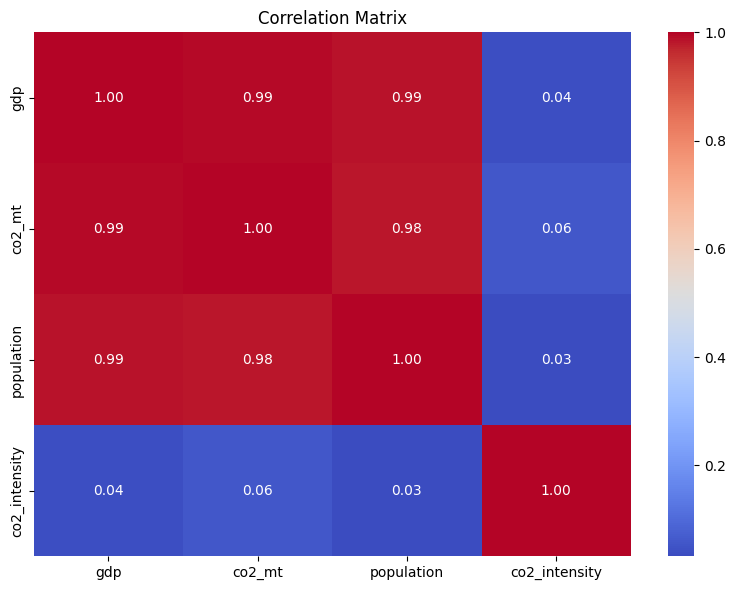

In [89]:

# Top emitters trend
top_emitters = df[df["year"] == df["year"].max()].nlargest(10, "co2_mt")["country"]
top_df = df[df["country"].isin(top_emitters)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_df, x="year", y="co2_mt", hue="country")
plt.title("CO₂ Emissions Over Time (Top 10 Emitters)")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_df, x="year", y="co2_pc", hue="country")
plt.title("Top 10 CO₂ Emitters (Per-Capita Emissions)")
plt.ylabel("CO₂ per Capita (Tonnes)")
plt.grid(True)
plt.show()


# Per-capita histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[df["year"] == df["year"].max()]["co2_pc"].dropna(), bins=40, kde=True)
plt.title("Per-Capita CO₂ Emissions Distribution (Latest Year)")
plt.xlabel("Tonnes per Person")
plt.grid(True)
plt.show()

# Correlation heatmap
corr_data = df[df["year"] == df["year"].max()][["gdp", "co2_mt", "population", "co2_intensity"]].dropna()
corr = corr_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


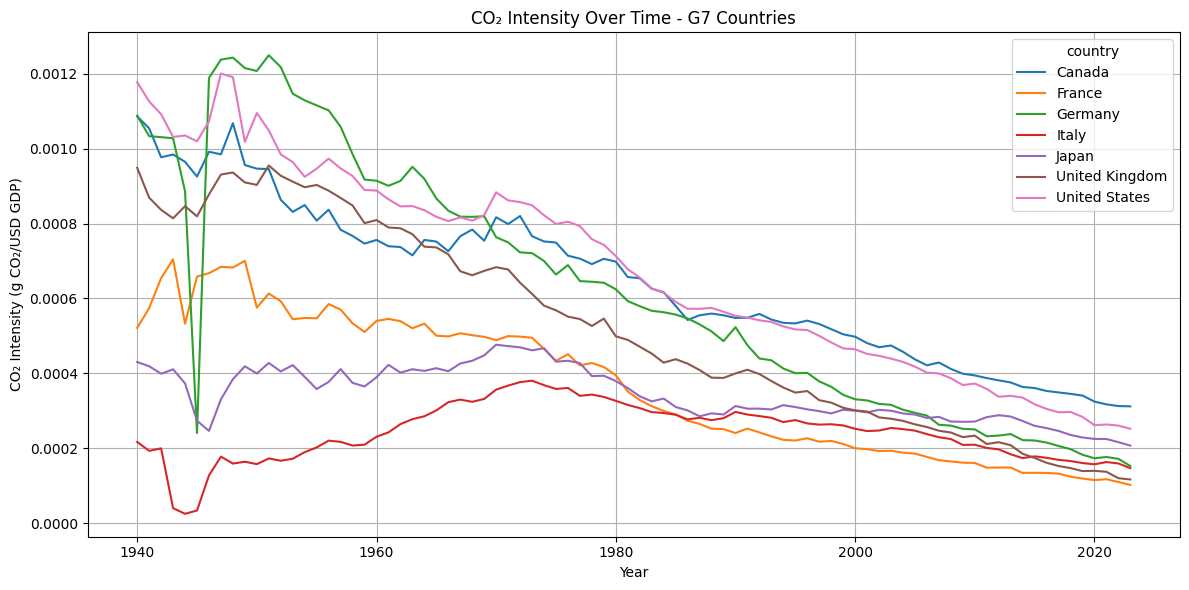

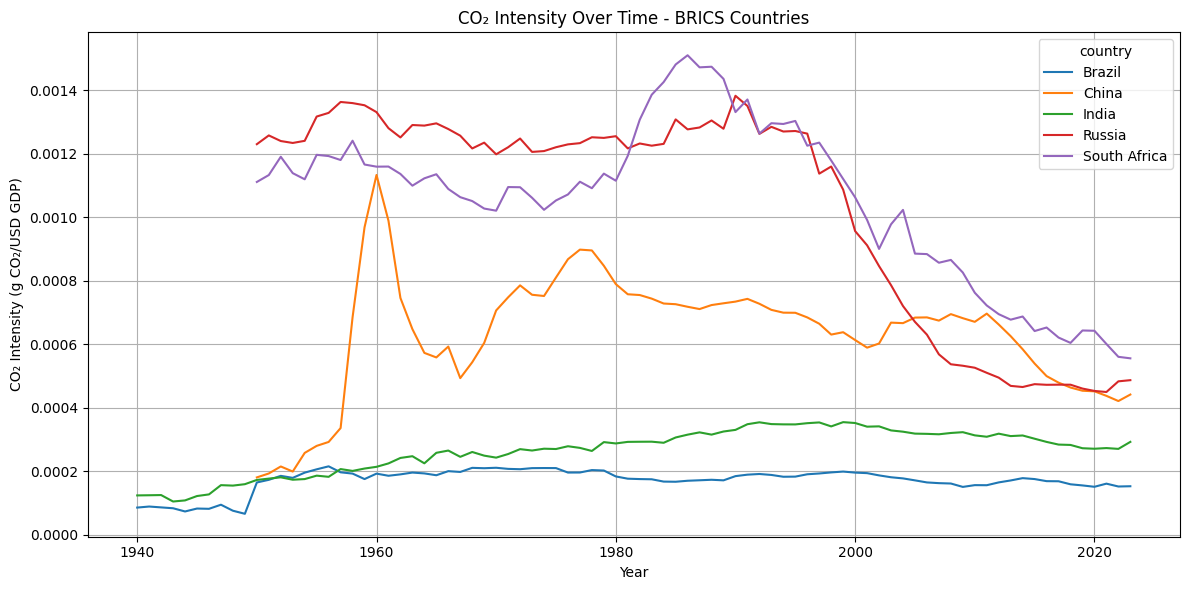

In [90]:
# Define groups
g7 = ["United States", "Germany", "United Kingdom", "Japan", "France", "Canada", "Italy"]
brics = ["Brazil", "Russia", "India", "China", "South Africa"]

# Filter datasets
g7_df = df[df["country"].isin(g7)]
brics_df = df[df["country"].isin(brics)]

# Plot CO₂ intensity for G7 countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=g7_df, x="year", y="co2_intensity", hue="country")
plt.title("CO₂ Intensity Over Time - G7 Countries")
plt.ylabel("CO₂ Intensity (g CO₂/USD GDP)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot CO₂ intensity for BRICS countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=brics_df, x="year", y="co2_intensity", hue="country")
plt.title("CO₂ Intensity Over Time - BRICS Countries")
plt.ylabel("CO₂ Intensity (g CO₂/USD GDP)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


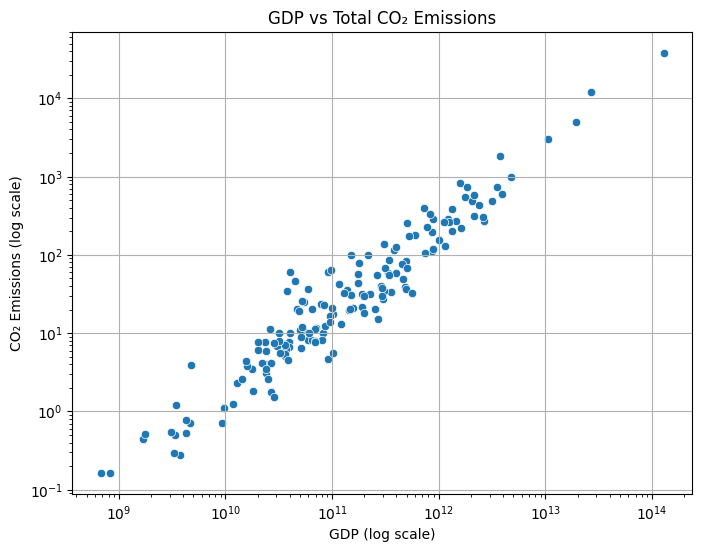

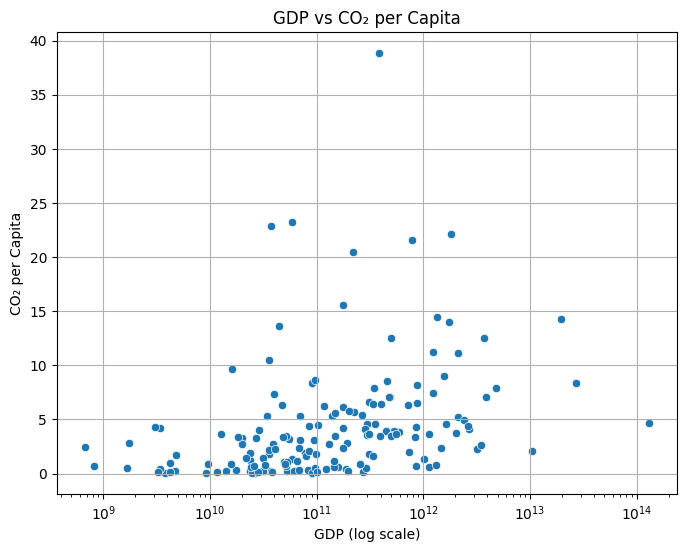

             gdp    co2_mt    co2_pc
gdp     1.000000  0.993909  0.052273
co2_mt  0.993909  1.000000  0.060221
co2_pc  0.052273  0.060221  1.000000


In [91]:
# Filter for latest year and drop missing values
recent_year = df["year"].max()

corr_df = df[df["year"] == recent_year][["country", "gdp", "co2_mt", "co2_pc"]].dropna()

# Plot scatter: GDP vs total CO₂
plt.figure(figsize=(8, 6))
sns.scatterplot(data=corr_df, x="gdp", y="co2_mt")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("GDP (log scale)")
plt.ylabel("CO₂ Emissions (log scale)")
plt.title("GDP vs Total CO₂ Emissions")
plt.grid(True)
plt.show()

# Plot scatter: GDP vs per-capita CO₂
plt.figure(figsize=(8, 6))
sns.scatterplot(data=corr_df, x="gdp", y="co2_pc")
plt.xscale("log")
plt.xlabel("GDP (log scale)")
plt.ylabel("CO₂ per Capita")
plt.title("GDP vs CO₂ per Capita")
plt.grid(True)
plt.show()

# Print correlation matrix
print(corr_df[["gdp", "co2_mt", "co2_pc"]].corr())


/var/folders/k9/2r2_wrrx7d540p_qp5j36xlr0000gn/T/ipykernel_74873/4169686234.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reduced_df, x="pct_change", y="country", palette="crest")


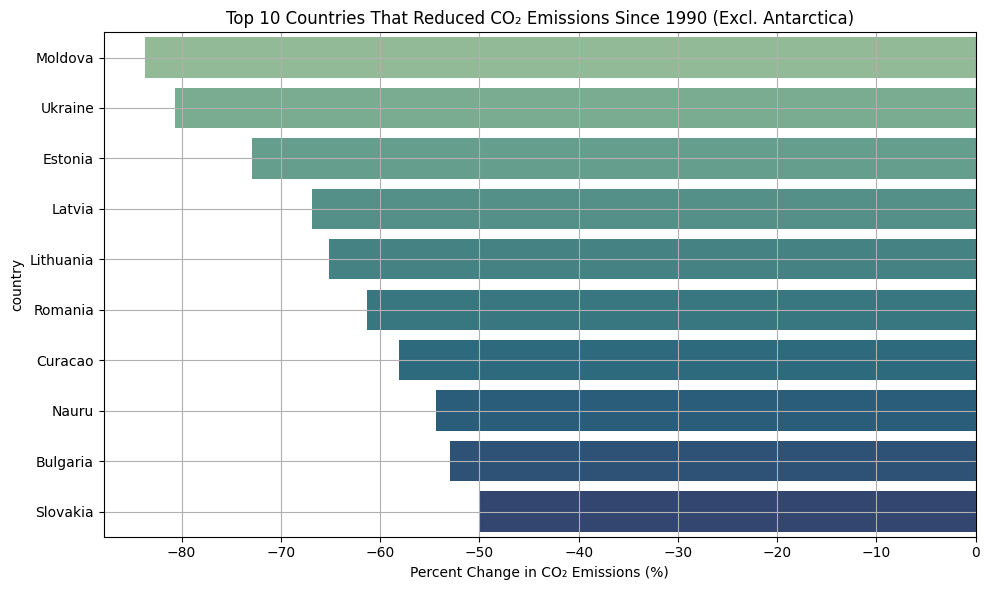

In [92]:
# Compare 1990 to latest year
change_df = df[df["year"].isin([1990, recent_year])]
pivot = change_df.pivot(index="country", columns="year", values="co2_mt").dropna()
pivot["change"] = pivot[recent_year] - pivot[1990]
pivot["pct_change"] = 100 * pivot["change"] / pivot[1990]

# Exclude Antarctica
pivot = pivot.drop("Antarctica", errors="ignore")

# Select countries with largest % decreases
reduced_df = pivot[pivot["change"] < 0].sort_values("pct_change").head(10).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=reduced_df, x="pct_change", y="country", palette="crest")
plt.title("Top 10 Countries That Reduced CO₂ Emissions Since 1990 (Excl. Antarctica)")
plt.xlabel("Percent Change in CO₂ Emissions (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/k9/2r2_wrrx7d540p_qp5j36xlr0000gn/T/ipykernel_74873/482830215.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_lc_proxy, x="low_carbon_proxy", y="country", palette="crest")


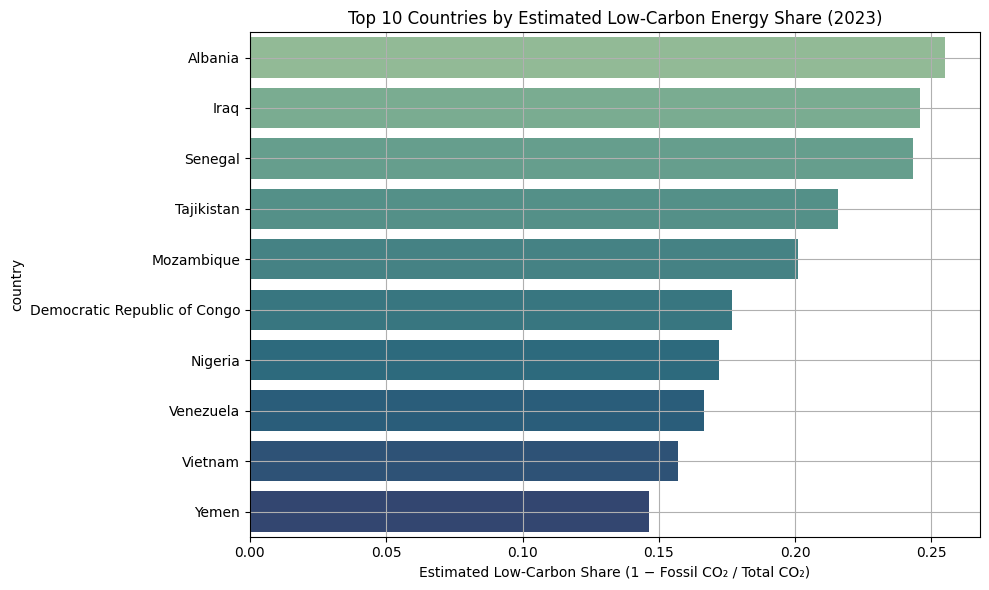

In [93]:
# Drop rows with missing values
df_lc = df[df["year"] == recent_year].copy()
df_lc = df_lc.dropna(subset=["co2_mt", "coal_co2", "oil_co2", "gas_co2"])

# Estimate fossil-related CO₂ and low-carbon share
df_lc["fossil_co2"] = df_lc["coal_co2"] + df_lc["oil_co2"] + df_lc["gas_co2"]
df_lc["low_carbon_proxy"] = 1 - (df_lc["fossil_co2"] / df_lc["co2_mt"])

# Remove countries with invalid values
df_lc = df_lc[(df_lc["low_carbon_proxy"] >= 0) & (df_lc["low_carbon_proxy"] <= 1)]

# Get top 10 countries by estimated low-carbon share
top_lc_proxy = df_lc.sort_values("low_carbon_proxy", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_lc_proxy, x="low_carbon_proxy", y="country", palette="crest")
plt.title(f"Top 10 Countries by Estimated Low-Carbon Energy Share ({recent_year})")
plt.xlabel("Estimated Low-Carbon Share (1 − Fossil CO₂ / Total CO₂)")
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/k9/2r2_wrrx7d540p_qp5j36xlr0000gn/T/ipykernel_74873/2610657115.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=region_df, x="region", y="co2_pc", palette="Set3")


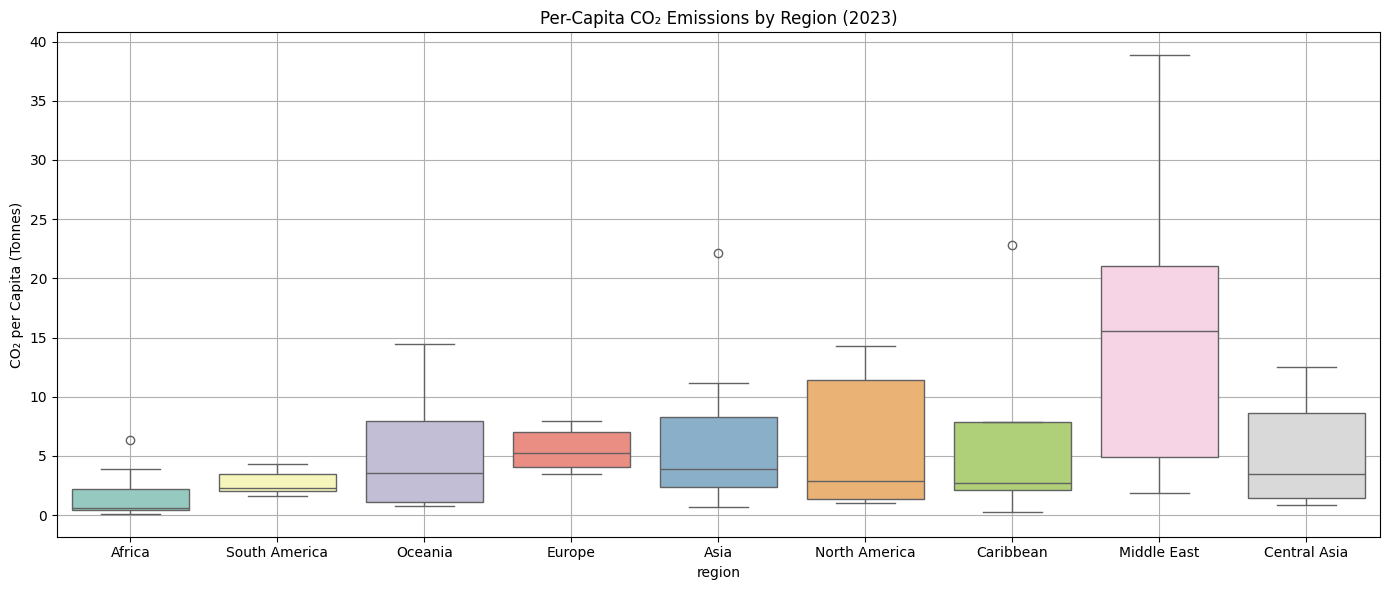

In [94]:
region_map = {
    # Africa
    "Nigeria": "Africa", "South Africa": "Africa", "Egypt": "Africa", "Kenya": "Africa", "Ethiopia": "Africa",
    "Morocco": "Africa", "Algeria": "Africa", "Ghana": "Africa", "Angola": "Africa", "Tanzania": "Africa",

    # Asia
    "China": "Asia", "India": "Asia", "Indonesia": "Asia", "Japan": "Asia", "South Korea": "Asia",
    "Pakistan": "Asia", "Bangladesh": "Asia", "Vietnam": "Asia", "Thailand": "Asia", "Philippines": "Asia",
    "Iran": "Asia", "Saudi Arabia": "Asia", "Turkey": "Asia", "Iraq": "Asia", "Malaysia": "Asia",

    # Europe
    "Germany": "Europe", "France": "Europe", "United Kingdom": "Europe", "Italy": "Europe",
    "Spain": "Europe", "Poland": "Europe", "Ukraine": "Europe", "Netherlands": "Europe",
    "Sweden": "Europe", "Norway": "Europe", "Greece": "Europe", "Portugal": "Europe", "Belgium": "Europe",
    "Czechia": "Europe", "Romania": "Europe", "Hungary": "Europe", "Austria": "Europe",

    # North America
    "United States": "North America", "Canada": "North America", "Mexico": "North America",
    "Cuba": "North America", "Guatemala": "North America", "Honduras": "North America",

    # South America
    "Brazil": "South America", "Argentina": "South America", "Colombia": "South America", 
    "Chile": "South America", "Peru": "South America", "Venezuela": "South America", 
    "Ecuador": "South America", "Bolivia": "South America", "Uruguay": "South America",

    # Oceania
    "Australia": "Oceania", "New Zealand": "Oceania", "Fiji": "Oceania", "Papua New Guinea": "Oceania",

    # Middle East (could be grouped separately or as part of Asia)
    "Israel": "Middle East", "United Arab Emirates": "Middle East", "Qatar": "Middle East",
    "Oman": "Middle East", "Kuwait": "Middle East", "Jordan": "Middle East", "Lebanon": "Middle East",

    # Central Asia
    "Kazakhstan": "Central Asia", "Uzbekistan": "Central Asia", "Turkmenistan": "Central Asia",
    "Kyrgyzstan": "Central Asia", "Tajikistan": "Central Asia",

    # Caribbean
    "Dominican Republic": "Caribbean", "Haiti": "Caribbean", "Jamaica": "Caribbean", "Trinidad and Tobago": "Caribbean"
}

df["region"] = df["country"].map(region_map)

region_df = df[(df["region"].notna()) & (df["year"] == recent_year)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=region_df, x="region", y="co2_pc", palette="Set3")
plt.title(f"Per-Capita CO₂ Emissions by Region ({recent_year})")
plt.ylabel("CO₂ per Capita (Tonnes)")
plt.grid(True)
plt.tight_layout()
plt.show()


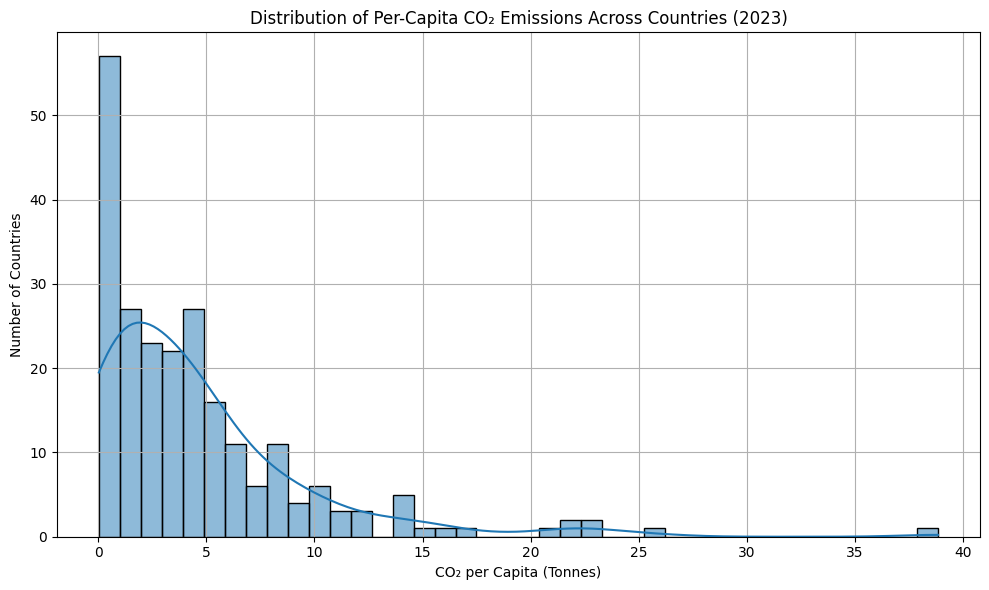

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df["year"] == recent_year]["co2_pc"].dropna(), bins=40, kde=True)
plt.title(f"Distribution of Per-Capita CO₂ Emissions Across Countries ({recent_year})")
plt.xlabel("CO₂ per Capita (Tonnes)")
plt.ylabel("Number of Countries")
plt.grid(True)
plt.tight_layout()
plt.show()


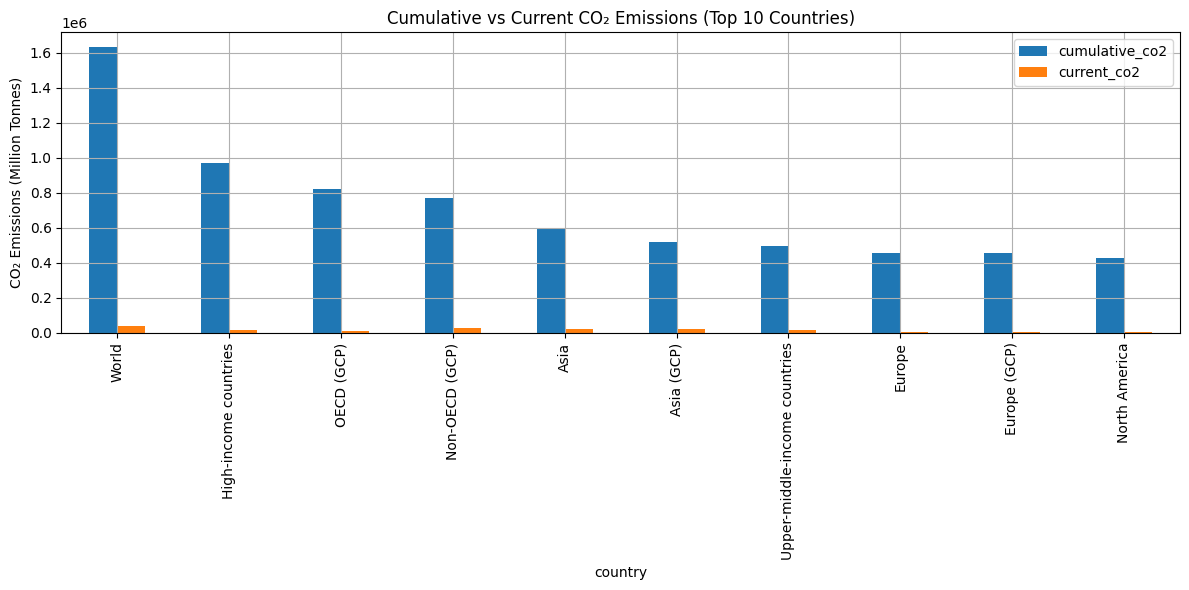

In [96]:
# Calculate cumulative and current emissions
cumulative = df[df["year"] <= recent_year].groupby("country")["co2_mt"].sum().reset_index(name="cumulative_co2")
current = df[df["year"] == recent_year][["country", "co2_mt"]].rename(columns={"co2_mt": "current_co2"})

# Merge and filter
merged = pd.merge(cumulative, current, on="country").sort_values("cumulative_co2", ascending=False).head(10)

# Plot
merged = merged.set_index("country")
merged[["cumulative_co2", "current_co2"]].plot(kind="bar", figsize=(12, 6))
plt.title("Cumulative vs Current CO₂ Emissions (Top 10 Countries)")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.grid(True)
plt.tight_layout()
plt.show()


Forecasting: 100%|██████████| 114/114 [00:02<00:00, 39.68it/s]


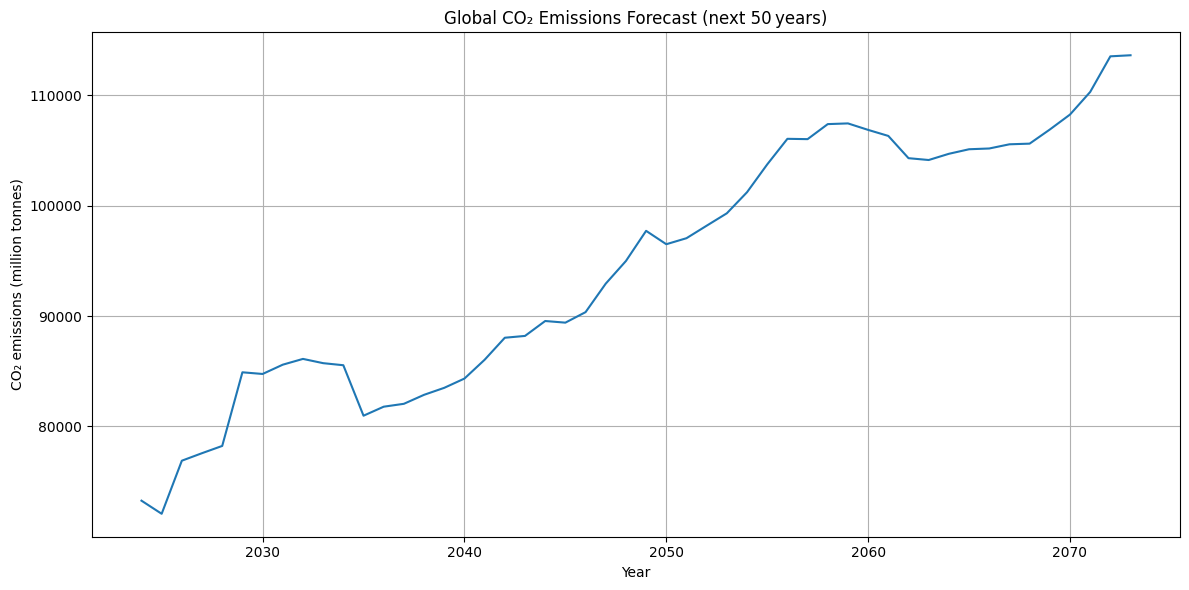

In [99]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm import tqdm

# ──────────────────────────────────────────────────────────────
# 1. LOAD & BASIC CLEANUP
# ──────────────────────────────────────────────────────────────
# ▸ You had no df = pd.read_csv(...) line in the snippet
df = pd.read_csv("data/owid-co2-data.csv")

# Restrict to years with reasonably complete GDP coverage
df = df[df["year"] >= 1970]

# Keep only rows that have the fossil‑fuel CO₂ sub‑components
df = df.dropna(
    subset=["co2", "coal_co2", "oil_co2", "gas_co2"]
).rename(columns={"co2": "co2_mt"})

# Forward‑fill GDP separately for each country
df["gdp"] = df.groupby("country")["gdp"].ffill()



# ──────────────────────────────────────────────────────────────
# 2. FEATURE ENGINEERING
# ──────────────────────────────────────────────────────────────
df["fossil_co2"] = df["coal_co2"] + df["oil_co2"] + df["gas_co2"]

# Avoid division by zero (replace 0 with a tiny value)
df["co2_mt_safe"] = df["co2_mt"].replace(.000000000001, 1e-6)
df["low_carbon_proxy"] = 1 - df["fossil_co2"] / df["co2_mt_safe"]

# Clip to [0,1] to remove numeric noise
df["low_carbon_proxy"] = df["low_carbon_proxy"].clip(0, 1)

# Lagged CO₂ (autoregressive term)
df["co2_mt_lag1"] = df.groupby("country")["co2_mt"].shift(1)

# Year‑over‑year growth in low‑carbon share
df["low_carbon_growth"] = (
    df.groupby("country")["low_carbon_proxy"].pct_change()
)

# Drop rows that still carry NaNs after engineering
df = df.dropna(
    subset=["co2_mt_lag1", "low_carbon_proxy", "low_carbon_growth", "gdp"]
)

# ──────────────────────────────────────────────────────────────
# 3. MODEL TRAINING
# ──────────────────────────────────────────────────────────────
features = ["co2_mt_lag1", "low_carbon_proxy", "low_carbon_growth", "gdp"]
target   = "co2_mt"


# 1️⃣ Replace infinities by NaNs
df[features] = df[features].replace([np.inf, -np.inf], np.nan)

# 2️⃣ Drop any row that now contains a NaN (training needs complete cases)
df = df.dropna(subset=features + [target])

# 3️⃣ (Optional) Cap extreme outliers that are still finite
abs_cap = 1e12
df[features] = df[features].clip(-abs_cap, abs_cap)


X, y = df[features], df[target]

model = xgb.XGBRegressor(
    n_estimators=300,      # a bit more trees for better fit
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X, y)

# ──────────────────────────────────────────────────────────────
# 4. 50‑YEAR RECURSIVE FORECAST FOR **EVERY** COUNTRY
# ──────────────────────────────────────────────────────────────
years_ahead = 50
start_year  = int(df["year"].max())
future_years = np.arange(start_year + 1, start_year + years_ahead + 1)

# Container for global totals
global_forecast = pd.DataFrame({"year": future_years, "co2_mt": 0.0})

for country in tqdm(df["country"].unique(), desc="Forecasting"):
    history = df[df["country"] == country].sort_values("year")
    if history.empty:
        continue

    last = history.iloc[-1]

    # Current state variables
    co2_lag      = last["co2_mt"]
    lc_share     = last["low_carbon_proxy"]
    lc_growth    = last["low_carbon_growth"]
    gdp_level    = last["gdp"]

    # Store the 50‑year path for this country
    country_preds = []

    for _ in range(years_ahead):
        # Assemble a single‑row DataFrame (same feature order!)
        row = pd.DataFrame({
            "co2_mt_lag1":      [co2_lag],
            "low_carbon_proxy": [lc_share],
            "low_carbon_growth": [lc_growth],
            "gdp":              [gdp_level],
        })

        # Predict next‑year CO₂
        next_co2 = model.predict(row)[0]
        country_preds.append(next_co2)

        # ⇢ Update state for next iteration
        co2_lag   = next_co2
        lc_growth = lc_growth * 0.98            # decay growth 2 %/year
        lc_share  = min(lc_share * (1 + lc_growth), 0.95)  # cap at 95 %
        gdp_level = gdp_level * 1.02            # assume +2 % real GDP

    # Add this country’s path to the global total
    global_forecast["co2_mt"] += country_preds

# ──────────────────────────────────────────────────────────────
# 5. PLOT
# ──────────────────────────────────────────────────────────────
plt.figure(figsize=(12, 6))
plt.plot(global_forecast["year"], global_forecast["co2_mt"], label="Predicted global CO₂")
plt.title("Global CO₂ Emissions Forecast (next 50 years)")
plt.xlabel("Year")
plt.ylabel("CO₂ emissions (million tonnes)")
plt.grid(True)
plt.tight_layout()
plt.show()
